# TEAM 7

In [1]:
# First of all check the update the user about the python
import warnings
from platform import python_version

# Custom function for showing only the relevant text message to the user truncating file path
def custom_formatwarning(msg, *args, **kwargs):
    # ignore everything except the message
    return str(msg) + '\n'
warnings.formatwarning = custom_formatwarning

if python_version().startswith("3.7"):
    print("Good To Go, Your python version is compatible with the code written in this notebook.")
else:
    warnings.warn("Warning! You do not have the required python format to run this script. Some features might not function as intended. Depending on your version, you might have to upgrade or downgrade to python 3.7.")

Good To Go, Your python version is compatible with the code written in this notebook.


In [2]:
# Downloading necessary modules
import sys
# !{sys.executable} -m pip install requests
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install sklearn
# !{sys.executable} -m pip install missingpy
# !{sys.executable} -m pip install imblearn
# !{sys.executable} -m pip install Boruta

# Importing "pandas" which is used to handle data preprocessing and analysis tasks
import pandas as pd

# To fetch files from the internet, we import "requests" library
import requests

# For numerical computation, we import numpy
import numpy as np

# Importing matplotlib for data visualisation and graphing
import matplotlib.pyplot as plt

# Import MinMax scaler to scale the variables for consistency
from sklearn.preprocessing import MinMaxScaler

# defining root url from where data is stored for this assignment
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/"


# <----------------------------Data preprocessing------------------------------->
# For splitting dataset into train-test and grid search
from sklearn.model_selection import train_test_split, GridSearchCV

# For KNN imputation
from missingpy import KNNImputer

# For normalizing the dataset
from sklearn.preprocessing import MinMaxScaler

# features selection
# Boruta
from boruta import boruta_py

# For Balancing the dataset
from imblearn.over_sampling import SMOTE, ADASYN


# <----------------------------Models used for training the dataset------------------------------->
# Ensemble methods for training
from sklearn.ensemble import RandomForestClassifier


# Support Vector Machine Classifier
from sklearn.svm import SVC


# <----------------------------Models Evaluation Strategies------------------------------->

from sklearn.metrics import average_precision_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve


# <--------------------------------Helper Libraries------------------------------------->

# For correlation between continuous and ordinal variable, we use scipy
from scipy import stats

# Plotting libraries used
import seaborn as sns


In [3]:
# fetching "secom_labels.data" file from the url defined above and formatting it
label_with_timestamp = pd.read_csv("{}secom_labels.data".format(url), sep='\s+',header=None)

In [4]:
# fetching "secom.data" file from the url defined above and formatting it
features = pd.read_csv("{}secom.data".format(url), sep='\s+',header=None)

In [5]:
# have a look at the columns of the labels file
label_with_timestamp.head()

,0,1
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,-1,19/07/2008 14:43:00
4,-1,19/07/2008 15:22:00


In [6]:
# renaming columns to label and timestamp respectively
label_with_timestamp.rename(columns={0: "label", 1: "timestamp"}, inplace=True)
# label_with_timestamp.head()

In [7]:
# have a look at features and its columns
features.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [8]:
# Label all the features with the feature prefix
features.columns = ['feature_' + str(int(col)+1) for col in features.columns]

# Check for confirmation
features.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [9]:
# Join label_with_timestamp with features 
complete_data = label_with_timestamp.join(features, how='outer')
# Check for confirmation
complete_data.head()

,label,timestamp,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
0,-1,19/07/2008 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,-1,19/07/2008 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,1,19/07/2008 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,-1,19/07/2008 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,-1,19/07/2008 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [10]:
# Convert timestamp column to standard datetime for further processing
complete_data['timestamp'] = pd.to_datetime(complete_data['timestamp'])

## 1. DATA PREPROCESSING

### 1.1 Removing Constant Features

In [11]:
# Remove constant features by checking if the variance of feature is 0
const_features = features.loc[:, features.var() == 0]


In [12]:
const_features.shape

(1567, 116)

In [13]:
# Eliminating columns that have constant value from the complete_data dataframe
complete_data_with_const_features_removed = complete_data.drop(const_features.columns, axis=1)
complete_data_with_const_features_removed.head(n=3)

,label,timestamp,feature_1,feature_2,feature_3,feature_4,feature_5,feature_7,feature_8,feature_9,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
0,-1,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,-1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,1,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602


In [14]:
complete_data_with_const_features_removed.shape

(1567, 476)

In [15]:
# Check for imbalance in the data
complete_data_with_const_features_removed.groupby(["label"])['timestamp'].count()

label
-1    1463
 1     104
Name: timestamp, dtype: int64

In [16]:
# null values in each row
null_count_in_rows = complete_data_with_const_features_removed[complete_data_with_const_features_removed.isnull().sum(axis=1)>=50]
print("Count of greater than 50 Null values in each row:", null_count_in_rows.shape[0])
null_count_in_rows = complete_data_with_const_features_removed[complete_data_with_const_features_removed.isnull().sum(axis=1)>=100]
print("Count of greater than 100 Null values in each row:", null_count_in_rows.shape[0])

Count of greater than 50 Null values in each row: 42
Count of greater than 100 Null values in each row: 3


### 1.2. Removing columns with too many null values 

In [17]:
# Calculations for plotting a histogram of null values in all features in descending order

# Sum up all the null values in each feature
total = complete_data_with_const_features_removed.isnull().sum().sort_values(ascending=False)

# Calculate percentage of null values in each column
percent = (100*complete_data_with_const_features_removed.isnull().sum()/complete_data_with_const_features_removed.isnull().count()).sort_values(ascending=False)

# Make a dataframe that has all the features and their corresponsding % missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing Values', 'Percent'])
missing_data.head()

,Total Missing Values,Percent
feature_159,1429,91.193363
feature_158,1429,91.193363
feature_293,1429,91.193363
feature_294,1429,91.193363
feature_359,1341,85.577537


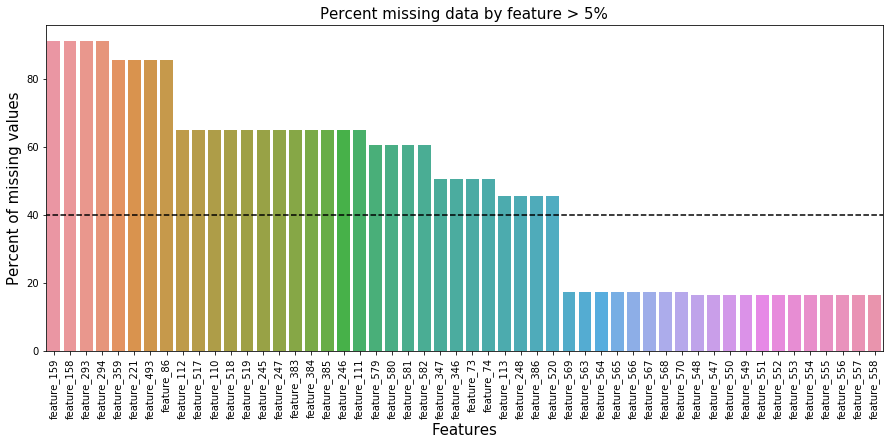

In [18]:
# All features that have greater than 5% missing values
missing_data_5 = missing_data[missing_data["Percent"]>5]

# Plotting histogram of columns having number of null values greater than 5%
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')

# Plotting Threshold
ax.hlines(40, -5, 60, linestyle='--')

sns.barplot(x=missing_data_5.index, y=missing_data_5['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature > 5%', fontsize=15)
plt.show();

In [19]:
# All features that have greater than 40% missing values
missing_data_40 = missing_data[missing_data["Percent"]>40]

In [20]:
# Check how many features have greater than 40% Null Values
len(missing_data_40)

32

In [21]:
# Dropping columns with greater than 40% null values (32 Features) from complete dataframe(that has constant columns removed)
complete_data_with_const_features_and_null_removed = complete_data_with_const_features_removed.drop(missing_data_40.index, axis=1)
complete_data_with_const_features_and_null_removed.head(n=1)

,label,timestamp,feature_1,feature_2,feature_3,feature_4,feature_5,feature_7,feature_8,feature_9,...,feature_577,feature_578,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
0,-1,2008-07-19 11:55:00,3030.93,2564.0,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.363,NaN,NaN,NaN,NaN


In [22]:
# Check the shape of newly created dataframe
complete_data_with_const_features_and_null_removed.shape

(1567, 444)

### 1.3 TRAIN TEST SPLIT

In [23]:
# Splitting dataset into train and test set with 60-40% respectively
X = complete_data_with_const_features_and_null_removed.iloc[:,2:]
y = complete_data_with_const_features_and_null_removed.iloc[:,:1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, stratify=y, random_state=42)

In [24]:
# Check shapes for consistency
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (940, 442)
X_test:  (627, 442)
y_train:  (940, 1)
y_test:  (627, 1)


In [25]:
# Imbalance in train set
y_train.label.value_counts()

-1    878
 1     62
Name: label, dtype: int64

In [26]:
# Imbalance in test set
y_test.label.value_counts()

-1    585
 1     42
Name: label, dtype: int64

### 1.4. NORMALIZATION

Normalization is necessary, since features have different ranges. We are going to performing Normalization before knn imputed datasets. For Normalizing, the range is (0, 1)


In [27]:
# Initialize Normalize object for KNN imputation
mm_scaler_knn = MinMaxScaler()

In [28]:
# Normalization the train features(X_train), will be used for KNN imputation
X_train_mm_scaled = mm_scaler_knn.fit_transform(X_train)

# Normalization the test features(X_test) with mean and std of train set
X_test_mm_scaled = mm_scaler_knn.transform(X_test)

In [29]:
# Convert Normalized train features to dataframe(since Normalizing returns numpy array) and rename columns
X_train_mm_scaled= pd.DataFrame(X_train_mm_scaled)
X_train_mm_scaled.columns = complete_data_with_const_features_and_null_removed.columns[2:]

# Convert Normalized test features to dataframe and rename columns
X_test_mm_scaled= pd.DataFrame(X_test_mm_scaled)
X_test_mm_scaled.columns = complete_data_with_const_features_and_null_removed.columns[2:]

X_test_mm_scaled.head(n=5)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_7,feature_8,feature_9,feature_10,feature_11,...,feature_577,feature_578,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
0,0.538721,0.501090,0.737460,0.235531,0.000728,0.435332,0.942457,0.408642,0.379784,0.436860,...,0.008677,0.063689,0.793750,0.004254,0.003902,0.004191,0.353383,0.166884,0.148551,0.085371
1,0.491559,0.531460,0.443761,0.248897,0.000180,0.412461,0.978227,0.663961,0.663395,0.304892,...,0.011228,0.035363,0.459375,0.035524,0.031220,0.034985,0.374269,0.241199,0.184783,0.105454
2,0.314141,0.464722,0.679898,0.353349,0.000242,0.394611,0.944790,0.443957,0.573111,0.370876,...,0.007990,0.031674,0.818750,0.020421,0.022439,0.019410,0.220551,0.169492,0.192029,0.231362
3,0.828735,0.334421,0.580442,0.125862,0.000076,0.457946,0.933904,0.665058,0.295388,0.475540,...,0.009461,0.032800,0.609375,0.019570,0.015610,0.019018,0.370927,0.367666,0.365942,0.154884
4,0.325519,0.493790,0.482208,0.290125,0.000611,0.358557,0.964230,0.527089,0.644750,0.422071,...,0.012410,0.113051,0.793750,0.014678,0.019512,0.014046,0.190476,0.089961,0.076087,0.230081


### 1.5. IMPUTATION

#### 1.5.1 Median Imputation

Imputing null values with median
Since when imputing median, it doesn't really matter if we impute before or after scaling the data, 
hence we impute before standardizing/normalizing

In [30]:
#Imputing train features
median_imputation_train_features = X_train.fillna(X_train.median())

#Imputing test features with median of train set
median_imputation_test_features = X_test.fillna(X_train.median())

#### 1.5.2 K-Nearest Neighbours Imputation

In [31]:
# Imputation using KNN, for the sake of simplicity, we are taking 10 neighbours
imputer = KNNImputer(n_neighbors=10, weights="distance")

In [32]:
# We are using fit_transform on train set and only transform on test set, for the same reason described before

# Performing KNN imputation on Normalized trainset
mm_scaled_knn_impute_train_features = imputer.fit_transform(X_train_mm_scaled)
mm_scaled_knn_impute_test_features = imputer.transform(X_test_mm_scaled)

'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
invalid value encountered in sqrt
'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.


In [ ]:
# Converting imputed array to dataframe
mm_scaled_knn_impute_train_features = pd.DataFrame(mm_scaled_knn_impute_train_features)
mm_scaled_knn_impute_test_features = pd.DataFrame(mm_scaled_knn_impute_test_features)

# Restoring column names in knn_imputation
mm_scaled_knn_impute_train_features.columns = complete_data_with_const_features_and_null_removed.columns[2:]
mm_scaled_knn_impute_test_features.columns = complete_data_with_const_features_and_null_removed.columns[2:]

### 1.6 FEATURE SELECTION

In [ ]:
# Applying Boruta to remove redundant features/ features selection

forest = RandomForestClassifier(class_weight='balanced', max_depth=1, random_state=10)

# <------------------------------Median---------------------------------->

boruta_median = boruta_py.BorutaPy(forest)
boruta_median.fit_transform(median_imputation_train_features.values, y_train.values.ravel())

# <------------------------------KNN---------------------------------->

boruta_mm_knn = boruta_py.BorutaPy(forest)
boruta_mm_knn.fit_transform(mm_scaled_knn_impute_train_features.values, y_train.values.ravel())
print(" ")

In [ ]:
# <------------------------Preparing Dataset with selected features given by Boruta-------------------------------->

# Filtering important features selected by boruta
boruta_median_df = pd.DataFrame(boruta_median.support_)
boruta_mm_knn_df = pd.DataFrame(boruta_mm_knn.support_)

# Taking transpose to convert index(feature names) to columns
boruta_median_df = boruta_median_df.transpose()
boruta_mm_knn_df = boruta_mm_knn_df.transpose()

# Renaming columns in order to preserve information about each feature
boruta_median_df.columns = complete_data_with_const_features_and_null_removed.iloc[:,2:].columns
boruta_mm_knn_df.columns = complete_data_with_const_features_and_null_removed.iloc[:,2:].columns

# Taking transpose again to fetch only important features in the next cell
boruta_median_df = boruta_median_df.transpose()
boruta_mm_knn_df = boruta_mm_knn_df.transpose()

In [ ]:
# Transforming median imputed train set using boruta(feature selection)
boruta_median_filtered = boruta_median.transform(median_imputation_train_features.values)

# Converting to dataframe
boruta_median_df_filtered = pd.DataFrame(boruta_median_filtered)

# Renaming columns
boruta_median_df_filtered.columns = boruta_median_df[boruta_median_df[0]==True].transpose().columns

# Check if everything worked
boruta_median_df_filtered.head(n=3)

In [ ]:
# Transforming Normalized KNN imputed train set using boruta(feature selection)
boruta_mm_knn_filtered = boruta_mm_knn.transform(mm_scaled_knn_impute_train_features.values)

# Converting to dataframe
boruta_mm_knn_df_filtered = pd.DataFrame(boruta_mm_knn_filtered)

# Renaming columns
boruta_mm_knn_df_filtered.columns = boruta_mm_knn_df[boruta_mm_knn_df[0]==True].transpose().columns

# Check if everything worked
boruta_mm_knn_df_filtered.head(n=3)

In [ ]:
# Checking common columns in both median and KNN imputed datasets
common_boruta = boruta_mm_knn_df_filtered.columns.intersection(boruta_median_df_filtered.columns)

In [ ]:
print("Common features selected by Boruta for both median/knn imputed datasets: ", len(common_boruta))

### 1.7. HANDLING IMBALANCE IN DATA

#### 1.7.1 SMOTE Balancing

SMOTE by default makes minority class equal to majority class. We are using default values for SMOTE object.

In [ ]:
# Instantiating smote object
smt = SMOTE()

In [ ]:
# SMOTE Balancing median imputed feature selected datasets
median_impute_smote_balanced_train_features, median_impute_smote_balanced_train_label = smt.fit_sample(boruta_median_df_filtered, y_train.values.ravel())

# SMOTE Balancing Normalized knn imputed feature selected datasets
mm_scaled_knn_impute_smote_balanced_train_features, mm_scaled_knn_impute_smote_balanced_train_label = smt.fit_sample(boruta_mm_knn_df_filtered, y_train.values.ravel())

#### 1.7.2 ADASYN Balancing

Since ADASYN is an improved version of SMOTE, it calculates how many minority class cases are needed to balance the dataset.

In [ ]:
ads = ADASYN()

In [ ]:
# ADASYN Balancing median imputed feature selected datasets
median_impute_adasyn_balanced_train_features, median_impute_adasyn_balanced_train_label = ads.fit_sample(boruta_median_df_filtered, y_train.values.ravel())

# ADASYN Balancing Normalized knn imputed feature selected datasets
mm_scaled_knn_impute_adasyn_balanced_train_features, mm_scaled_knn_impute_adasyn_balanced_train_label = ads.fit_sample(boruta_mm_knn_df_filtered, y_train.values.ravel())

In [ ]:
print("median before balancing (rows, features): ", boruta_median_df_filtered.shape)
print("KNN mm before balancing (rows, features): ", boruta_mm_knn_df_filtered.shape)
print("")
print("median after SMOTE balancing (rows, features): ", median_impute_smote_balanced_train_features.shape)
print("KNN mm after SMOTE balancing (rows, features): ", mm_scaled_knn_impute_smote_balanced_train_features.shape)
print("")
print("median after ADASYN balancing (rows, features): ", median_impute_adasyn_balanced_train_features.shape)
print("KNN mm after ADASYN balancing (rows, features): ", mm_scaled_knn_impute_adasyn_balanced_train_features.shape)

In [ ]:
print("Majority/ Minority Balance after SMOTE and ADASYN")
print("")
print("Median SMOTE: ", np.unique(median_impute_smote_balanced_train_label, return_counts=True)[1])

print("KNN mm SMOTE: ", np.unique(mm_scaled_knn_impute_smote_balanced_train_label, return_counts=True)[1])

print("Median ADASYN: ", np.unique(median_impute_adasyn_balanced_train_label, return_counts=True)[1])

print("KNN mm ADASYN: ", np.unique(mm_scaled_knn_impute_adasyn_balanced_train_label, return_counts=True)[1])

In [ ]:
# Converting balanced datasets to dataframe and preserving original feature numbers
# (fit_sample from SMOTE and ADASYN returns numpy array)

# <------------------------------Median---------------------------------->
median_impute_smote_balanced_train_features = pd.DataFrame(median_impute_smote_balanced_train_features)
median_impute_smote_balanced_train_label = pd.DataFrame(median_impute_smote_balanced_train_label)

median_impute_adasyn_balanced_train_features = pd.DataFrame(median_impute_adasyn_balanced_train_features)
median_impute_adasyn_balanced_train_label = pd.DataFrame(median_impute_adasyn_balanced_train_label)

# Renaming columns to preserve feature numbers
median_impute_smote_balanced_train_features.columns = boruta_median_df_filtered.columns
median_impute_smote_balanced_train_label.columns = complete_data_with_const_features_and_null_removed.columns[:1]

median_impute_adasyn_balanced_train_features.columns = boruta_median_df_filtered.columns
median_impute_adasyn_balanced_train_label.columns = complete_data_with_const_features_and_null_removed.columns[:1]

# <------------------------------- KNN ----------------------------------->
mm_scaled_knn_impute_smote_balanced_train_features = pd.DataFrame(mm_scaled_knn_impute_smote_balanced_train_features)
mm_scaled_knn_impute_smote_balanced_train_label = pd.DataFrame(mm_scaled_knn_impute_smote_balanced_train_label)

mm_scaled_knn_impute_adasyn_balanced_train_features = pd.DataFrame(mm_scaled_knn_impute_adasyn_balanced_train_features)
mm_scaled_knn_impute_adasyn_balanced_train_label = pd.DataFrame(mm_scaled_knn_impute_adasyn_balanced_train_label)

# Renaming columns to preserve feature numbers
mm_scaled_knn_impute_smote_balanced_train_features.columns = boruta_mm_knn_df_filtered.columns
mm_scaled_knn_impute_smote_balanced_train_label.columns = complete_data_with_const_features_and_null_removed.columns[:1]

mm_scaled_knn_impute_adasyn_balanced_train_features.columns = boruta_mm_knn_df_filtered.columns
mm_scaled_knn_impute_adasyn_balanced_train_label.columns = complete_data_with_const_features_and_null_removed.columns[:1]


## 2. TRAINING AND EVALUATING DIFFERENT MODELS

### 2.1. Helper function for model evaluation

In [ ]:
# Helper function for calculating model performance
def modelEvaluation(y_pred, model_heading="Model: "):
    average_precision = average_precision_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, labels=[-1, 1])

#     Model evaluation metrics
    print(model_heading)
    print("average_precision: {:0.2f}".format(average_precision))
    print("precision: {:0.2f}".format(precision))
    print("recall: {:0.2f}".format(recall))
    print("f1: {:0.2f}".format(f1))
    print("cm: ", cm)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[-1, 1]).ravel()
    print("tn, fp, fn, tp: ", tn, fp, fn, tp)
    
    Accuracy = (tn + tp)*100/(tp + tn + fp + fn) 
    print("Accuracy {:0.2f}%".format(Accuracy))
    print("True Negative Rate: {:0.2f}".format(tn/(tn + fp)))
    print("Area Under The ROC Curve: {:0.2f}".format(roc_auc_score(y_test, y_pred)))

    print("")
    
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # show the plot
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title("ROC Curve")
    plt.show()
    
#     Plotting precision, recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred)

    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))
    plt.show();
    print("")

### 2.2. Random Forest Classifier before feature selection

This is done in order to compare how feature selection is affecting the overall evaluation metrics.

#### 2.2.1 Training

In [ ]:
# Training Random Forest Classifier on 444 features to compare it later after feature selection

# <------------------------------Median---------------------------------->

# RF classifier for median imputed dataset
rf_model_median_imputed = RandomForestClassifier(n_estimators=100, class_weight="balanced", max_depth=1, random_state=10)
rf_model_median_imputed.fit(median_imputation_train_features, y_train.values.ravel())


# <------------------------------KNN---------------------------------->

# RF classifier for KNN imputed -> Normalized
rf_model_mm_scaled_knn_imputed = RandomForestClassifier(n_estimators=100, class_weight="balanced", max_depth=1, random_state=10)
rf_model_mm_scaled_knn_imputed.fit(mm_scaled_knn_impute_train_features, y_train.values.ravel())
print("")

In [ ]:
# Predictions using the RF Model built in the previous step

# <------------------------------Median---------------------------------->
rf_predict_median_test_feat = rf_model_median_imputed.predict(median_imputation_test_features)


# <------------------------------KNN---------------------------------->
rf_predict_knn_mm_test_feat = rf_model_mm_scaled_knn_imputed.predict(mm_scaled_knn_impute_test_features)

#### 2.2.2 Evaluating

In [ ]:
# Model Evaluation of Random Forest before feature selection

# <------------------------------Median---------------------------------->
modelEvaluation(rf_predict_median_test_feat, "Median Imputed RF without feature selection and Balancing: ")

# <------------------------------KNN---------------------------------->
# --- Min/Max Scaled ---
modelEvaluation(rf_predict_knn_mm_test_feat, "Normalized KNN imputed RF without feature selection and Balancing: ")

### 2.3. RF classifier on selected features

#### 2.3.1 Training

In [ ]:
def rfClassifierObject(n_estimators=100, class_weight="balanced", max_depth=1):
#     Initiate RF Object for all 4 combinations
    rf_median_smt_filtered = RandomForestClassifier(n_estimators=n_estimators, class_weight=class_weight, max_depth=max_depth, random_state=10)
    rf_median_ads_filtered = RandomForestClassifier(n_estimators=n_estimators, class_weight=class_weight, max_depth=max_depth, random_state=10)
    
    rf_mm_knn_smt_filtered = RandomForestClassifier(n_estimators=n_estimators, class_weight=class_weight, max_depth=max_depth, random_state=10)
    rf_mm_knn_ads_filtered = RandomForestClassifier(n_estimators=n_estimators, class_weight=class_weight, max_depth=max_depth, random_state=10)
    
#     Fitting and predicing using instantiated object
    y_pred_rf_med_smt = rf_median_smt_filtered.fit(median_impute_smote_balanced_train_features, median_impute_smote_balanced_train_label.values.ravel()).predict(median_imputation_test_features[boruta_median_df_filtered.columns])
    y_pred_rf_med_ads = rf_median_ads_filtered.fit(median_impute_adasyn_balanced_train_features, median_impute_adasyn_balanced_train_label.values.ravel()).predict(median_imputation_test_features[boruta_median_df_filtered.columns])
    
    y_pred_rf_mm_knn_smt = rf_mm_knn_smt_filtered.fit(mm_scaled_knn_impute_smote_balanced_train_features, mm_scaled_knn_impute_smote_balanced_train_label.values.ravel()).predict(mm_scaled_knn_impute_test_features[boruta_mm_knn_df_filtered.columns])
    y_pred_rf_mm_knn_ads = rf_mm_knn_ads_filtered.fit(mm_scaled_knn_impute_adasyn_balanced_train_features, mm_scaled_knn_impute_adasyn_balanced_train_label.values.ravel()).predict(mm_scaled_knn_impute_test_features[boruta_mm_knn_df_filtered.columns])
    
    return y_pred_rf_med_smt, y_pred_rf_mm_knn_smt, y_pred_rf_med_ads, y_pred_rf_mm_knn_ads

#### 2.3.2 Evaluating

In [ ]:
# Evaluating each RF after feature selection
modelEvaluation(rfClassifierObject(100, "balanced")[0], "Median Imputed SMOTE RF after feature selection(Boruta): ")
modelEvaluation(rfClassifierObject(100, "balanced")[1], "Normalized KNN imputed RF SMOTE after feature selection(Boruta): ")

modelEvaluation(rfClassifierObject(100, "balanced")[2], "Median Imputed ADASYN RF after feature selection(Boruta): ")
modelEvaluation(rfClassifierObject(100, "balanced")[3], "Normalized KNN imputed ADASYN RF after feature selection(Boruta): ")

### 2.4 SVM classifier on selected features

#### 2.4.1 Training

In [ ]:
# instantiating Support Vector Machine Classifier
# On SMOTE Balanced Dataset
svm_md_smt = SVC(kernel='sigmoid', gamma='auto', probability=True, random_state=10)
svm_mm_knn_smt = SVC(kernel='sigmoid', gamma='auto', probability=True, random_state=10)

# On ADASYN Balanced Dataset
svm_md_ads = SVC(kernel='sigmoid', gamma='auto', probability=True, random_state=10)
svm_mm_knn_ads = SVC(kernel='sigmoid', gamma='auto', probability=True, random_state=10)

# Fitting and predicting on SMOTE balanced
y_pred_svm_med_smt = svm_md_smt.fit(median_impute_smote_balanced_train_features, median_impute_smote_balanced_train_label.values.ravel()).predict(median_imputation_test_features[boruta_median_df_filtered.columns])
y_pred_svm_mm_knn_smt = svm_mm_knn_smt.fit(mm_scaled_knn_impute_smote_balanced_train_features, mm_scaled_knn_impute_smote_balanced_train_label.values.ravel()).predict(mm_scaled_knn_impute_test_features[boruta_mm_knn_df_filtered.columns])

# Fitting and predicting on ADASYN balanced
y_pred_svm_med_ads = svm_md_ads.fit(median_impute_adasyn_balanced_train_features, median_impute_adasyn_balanced_train_label.values.ravel()).predict(median_imputation_test_features[boruta_median_df_filtered.columns])
y_pred_svm_mm_knn_ads = svm_mm_knn_ads.fit(mm_scaled_knn_impute_adasyn_balanced_train_features, mm_scaled_knn_impute_adasyn_balanced_train_label.values.ravel()).predict(mm_scaled_knn_impute_test_features[boruta_mm_knn_df_filtered.columns])


#### 2.4.2 Evaluating

In [ ]:
# Model Evaluation
# SMOTE
modelEvaluation(y_pred_svm_med_smt, "Median Imputed SMOTE SVM after feature selection(Boruta): ")
modelEvaluation(y_pred_svm_mm_knn_smt, "Normalized KNN imputed SMOTE SVM after feature selection(Boruta): ")

# ADASYN
modelEvaluation(y_pred_svm_med_ads, "Median Imputed ADASYN SVM after feature selection(Boruta): ")
modelEvaluation(y_pred_svm_mm_knn_ads, "Normalized KNN imputed ADASYN SVM after feature selection(Boruta): ")

## 3. GRID SEARCH

### 3.1. Random Forest

In [ ]:
param = {'n_estimators': [50],
        'min_samples_split': [2, 3, 4, 5],
        'min_samples_leaf': [0.1, 0.2, 0.3, 0.5],
        'max_depth': [1, 2, 3],
        'max_features': ('auto', 'sqrt', 'log2')}


rf_md = RandomForestClassifier(random_state=10)
rf_mm_knn = RandomForestClassifier(random_state=10)

rfGS_md_smt = GridSearchCV(rf_md, param, cv=5)
rfGS_mm_knn_smt = GridSearchCV(rf_mm_knn, param, cv=5)
rfGS_md_ads = GridSearchCV(rf_md, param, cv=5)
rfGS_mm_knn_ads = GridSearchCV(rf_mm_knn, param, cv=5)

y_pred_rfGS_med_smt = rfGS_md_smt.fit(median_impute_smote_balanced_train_features, median_impute_smote_balanced_train_label.values.ravel()).predict(median_imputation_test_features[boruta_median_df_filtered.columns])
y_pred_rfGS_med_ads = rfGS_md_ads.fit(median_impute_adasyn_balanced_train_features, median_impute_adasyn_balanced_train_label.values.ravel()).predict(median_imputation_test_features[boruta_median_df_filtered.columns])

y_pred_rfGS_mm_knn_smt = rfGS_mm_knn_smt.fit(mm_scaled_knn_impute_smote_balanced_train_features, mm_scaled_knn_impute_smote_balanced_train_label.values.ravel()).predict(mm_scaled_knn_impute_test_features[boruta_mm_knn_df_filtered.columns])
y_pred_rfGS_mm_knn_ads = rfGS_mm_knn_ads.fit(mm_scaled_knn_impute_adasyn_balanced_train_features, mm_scaled_knn_impute_adasyn_balanced_train_label.values.ravel()).predict(mm_scaled_knn_impute_test_features[boruta_mm_knn_df_filtered.columns])


In [ ]:
# Model Evaluation
# SMOTE
modelEvaluation(y_pred_rfGS_med_smt, "Tuned Median Imputed SMOTE RF after feature selection(Boruta): ")
modelEvaluation(y_pred_rfGS_mm_knn_smt, "Tuned Normalized KNN imputed SMOTE RF after feature selection(Boruta): ")

# ADASYN
modelEvaluation(y_pred_rfGS_med_ads, "Tuned Median Imputed ADASYN RF after feature selection(Boruta): ")
modelEvaluation(y_pred_rfGS_mm_knn_ads, "Tuned Normalized KNN imputed ADASYN RF after feature selection(Boruta): ")

### 3.2. SVM

In [ ]:
# Commenting it out because it takes hours to run, the results are in the presentation

# param = {
#     'C': [1, 10, 100], 
#     'kernel': ['rbf', 'linear', 'sigmoid'],
#     'probability': [True, False],
#     'gamma': ['scale']
#     }


# svc_md = SVC()
# svc_mm_knn = SVC()

# svcGS_md_smt = GridSearchCV(svc_md, param, cv=5)
# svcGS_mm_knn_smt = GridSearchCV(svc_mm_knn, param, cv=5)
# svcGS_md_ads = GridSearchCV(svc_md, param, cv=5)
# svcGS_mm_knn_ads = GridSearchCV(svc_mm_knn, param, cv=5)

# y_pred_svcGS_med_smt = svcGS_md_smt.fit(median_impute_smote_balanced_train_features, median_impute_smote_balanced_train_label.values.ravel()).predict(median_imputation_test_features[boruta_median_df_filtered.columns])
# y_pred_svcGS_med_ads = svcGS_md_ads.fit(median_impute_adasyn_balanced_train_features, median_impute_adasyn_balanced_train_label.values.ravel()).predict(median_imputation_test_features[boruta_median_df_filtered.columns])

# y_pred_svcGS_mm_knn_smt = svcGS_mm_knn_smt.fit(mm_scaled_knn_impute_smote_balanced_train_features, mm_scaled_knn_impute_smote_balanced_train_label.values.ravel()).predict(mm_scaled_knn_impute_test_features[boruta_mm_knn_df_filtered.columns])
# y_pred_svcGS_mm_knn_ads = svcGS_mm_knn_ads.fit(mm_scaled_knn_impute_adasyn_balanced_train_features, mm_scaled_knn_impute_adasyn_balanced_train_label.values.ravel()).predict(mm_scaled_knn_impute_test_features[boruta_mm_knn_df_filtered.columns])

# # Model Evaluation
# # SMOTE
# modelEvaluation(y_pred_svcGS_med_smt, "Tuned Median Imputed SMOTE SVM after feature selection(Boruta): ")
# modelEvaluation(y_pred_svcGS_mm_knn_smt, "Tuned Median Imputed SMOTE SVM after feature selection(Boruta): ")


# # ADASYN
# modelEvaluation(y_pred_svcGS_med_ads, "Tuned Normalized KNN imputed ADASYN SVM after feature selection(Boruta): ")
# modelEvaluation(y_pred_svcGS_mm_knn_ads, "Tuned Normalized KNN imputed ADASYN SVM after feature selection(Boruta): ")